#### Loading packages

In [1]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline

sns.set(rc={"figure.figsize":(30, 5)})



### Setting working directories

In [2]:
wd = 'C:/Users/napcc/Dropbox (CPI)/EduardoMinsky/Analise_TellesPires/Analise_Current/HighValuesForPolygons/'
alertas = 'Analise_AlertasMapBiomes/'
prodes = 'Analise_PRODES/'
uso_solo ='Analise_UsoDoSolo/'

### Working with Landuse tabular data for BySum

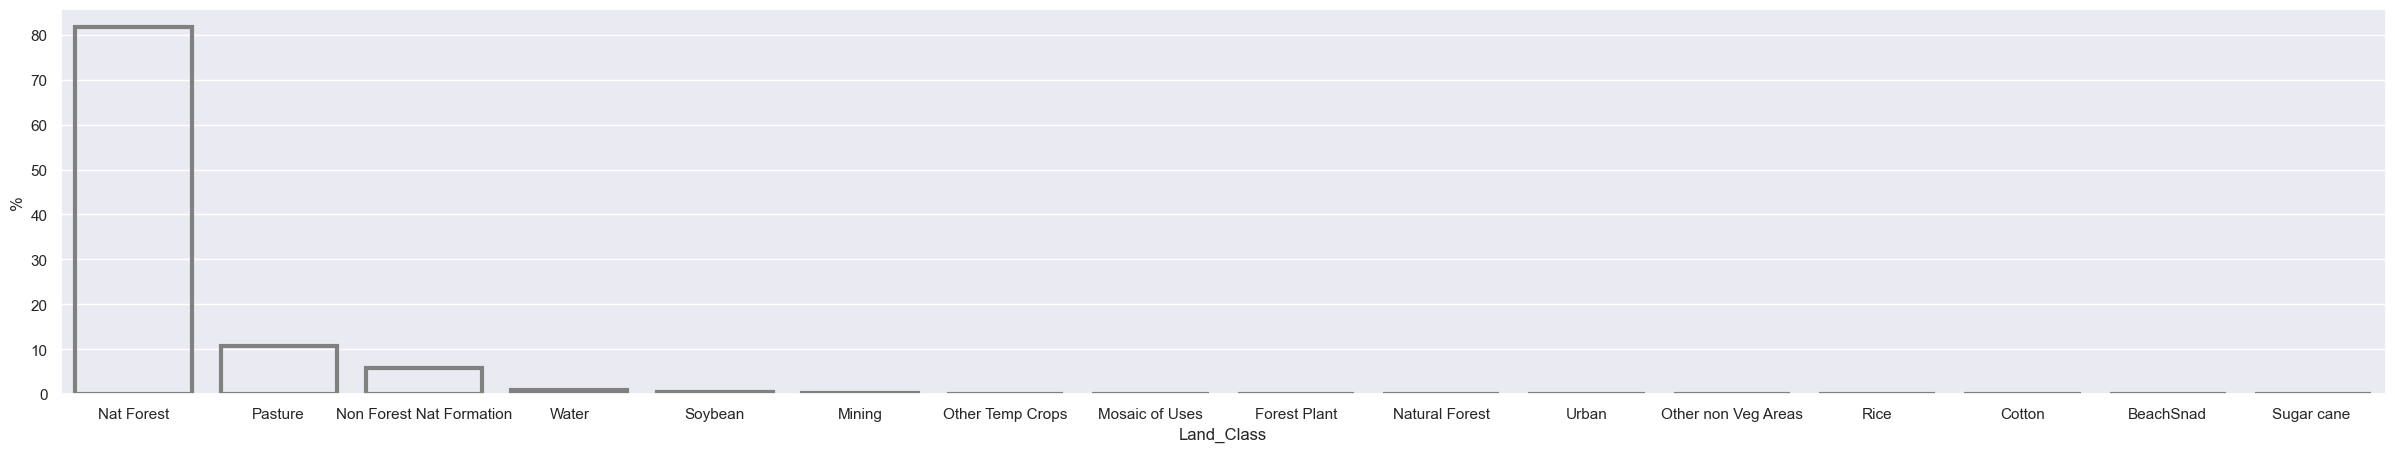

In [32]:
#For BySum
#Creating a unique DataFrame for all classes of Land Tenure

#Creating list with files!
list_files = glob.glob(wd+uso_solo+"BySum/Tables/*.csv")

#Creating dict to rename number to classes
dict_value = {3:"Nat Forest",4:'Nat Forest',9:'Forest Plant',11:'Non Forest Nat Formation',12:'Non Forest Nat Formation',15:'Pasture',24:'Urban',30:'Mining',33:'Water',41:'Other Temp Crops',21:'Mosaic of Uses',25:'Other non Veg Areas',39:'Soybean',62:'Cotton',20:'Sugar cane ',29:'Non Forest Nat Formation',
              0:float('NaN'),5:'Natural Forest',23:'BeachSnad',32:'Non Forest Nat Formation',40:'Rice'}

#Reading all dataframes and merging
pd_list = []
for i in range(len(list_files)):
    pd_list.append(pd.read_csv(list_files[i],sep = ';'))
pd_merge =pd.concat(pd_list)
#Creating a column with that class value
pd_merge["Land_Class"] = pd_merge['Value'].map(dict_value)
pd_merge =  pd_merge[pd_merge.Value != 0]
#Reseting and del index col
pd_merge.reset_index(inplace=True)
del pd_merge['index']
#Passing count column from str to numeric
pd_merge['Count'] = pd_merge['Count'].str.replace(",",".").astype(float)

#Creating a merged dataframe and creating a column with %
data_merged = pd_merge.groupby('Land_Class',as_index = False)['Count'].sum().sort_values('Count',ascending = False)
sum_values = pd_merge['Count'].sum()
data_merged['%'] = (data_merged['Count'] / sum_values)*100

y = sns.barplot(
    data=data_merged, x=data_merged.Land_Class, y="%", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
data_merged

In [34]:
data_merged.Count.sum()

384042477.0

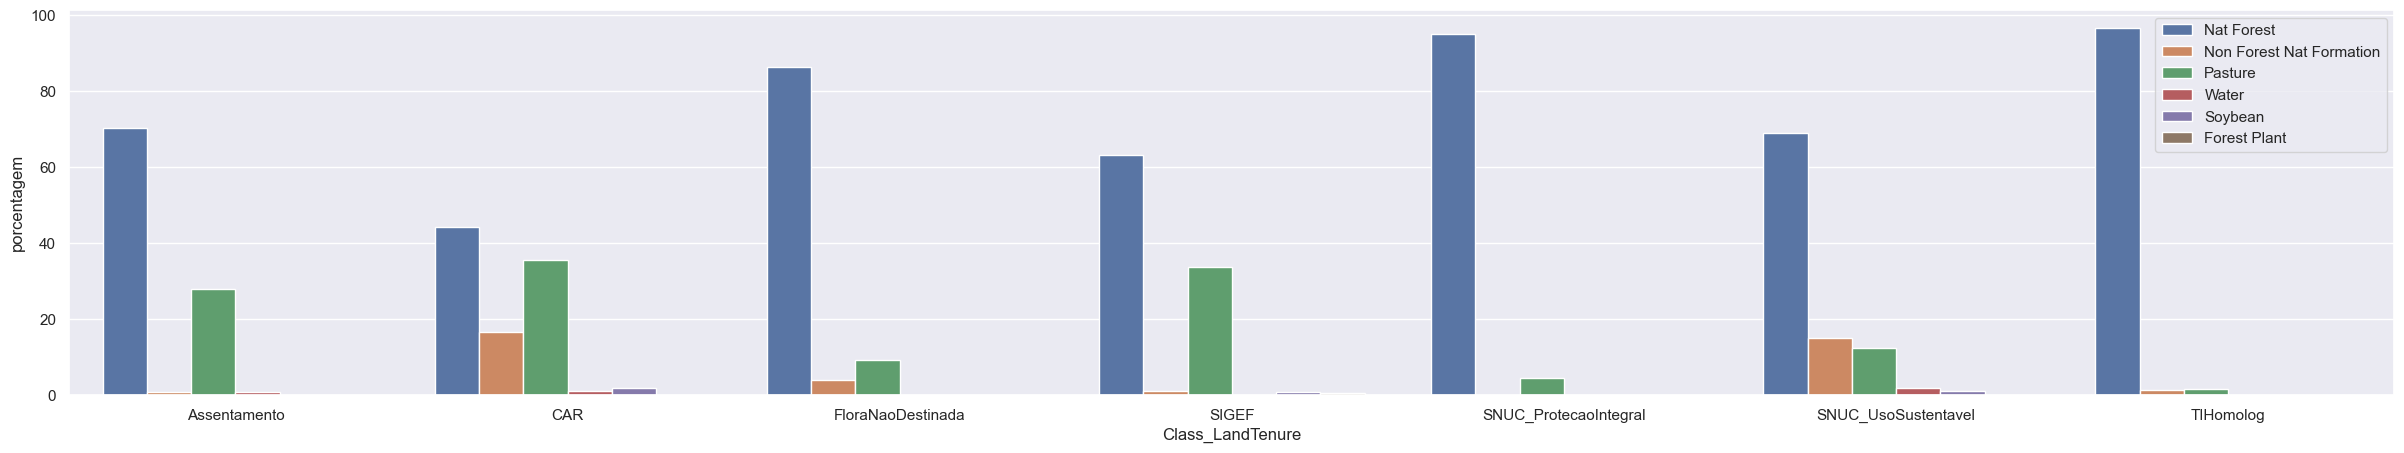

In [13]:
#Working with the diferent classes of landTenure
#Creating list with files!
list_files = glob.glob(wd+uso_solo+"BySum/Tables/*.csv")

dict_value = {3:"Nat Forest",4:'Nat Forest',9:'Forest Plant',11:'Non Forest Nat Formation',12:'Non Forest Nat Formation',15:'Pasture',24:'Urban',30:'Mining',33:'Water',41:'Other Temp Crops',21:'Mosaic of Uses',25:'Other non Veg Areas',39:'Soybean',62:'Cotton',20:'Sugar cane ',29:'Non Forest Nat Formation',
              0:float('NaN'),5:'Natural Forest',23:'BeachSnad',32:'Non Forest Nat Formation',40:'Rice'}


#Reading all dataframes and merging
pd_list_2 = []
for i in range(len(list_files)):
    if 'Assentamento' in list_files[i]:
        assentamento = pd.read_csv(list_files[i],sep = ';')
        assentamento['Class_LandTenure'] = 'Assentamento'
        assentamento['Count'] = assentamento['Count'].str.replace(",",".").astype(float)
        assentamento["Land_Class"] = assentamento['Value'].map(dict_value)
        assentamento =  assentamento[assentamento.Value != 0]
        assentamento['porcentagem'] = (assentamento['Count'] / assentamento['Count'].sum())*100
               
        
    elif 'CAR_By_SUM' in list_files[i]:
        car = pd.read_csv(list_files[i],sep = ';')
        car['Class_LandTenure'] = 'CAR'
        car['Count'] = car['Count'].str.replace(",",".").astype(float)
        car["Land_Class"] = car['Value'].map(dict_value)
        car =  car[car.Value != 0]
        car['porcentagem'] = (car['Count'] / car['Count'].sum())*100
        
    elif 'FloraNaoDestinada' in list_files[i]:
        FloraNaoDestinada = pd.read_csv(list_files[i],sep = ';')
        FloraNaoDestinada['Class_LandTenure'] = 'FloraNaoDestinada'
        FloraNaoDestinada['Count'] = FloraNaoDestinada['Count'].str.replace(",",".").astype(float)
        FloraNaoDestinada["Land_Class"] = FloraNaoDestinada['Value'].map(dict_value)
        FloraNaoDestinada =  FloraNaoDestinada[FloraNaoDestinada.Value != 0]
        FloraNaoDestinada['porcentagem'] = (FloraNaoDestinada['Count'] / FloraNaoDestinada['Count'].sum())*100
        
    elif 'SIGEF' in list_files[i]:
        SIGEF = pd.read_csv(list_files[i],sep = ';')
        SIGEF['Class_LandTenure'] = 'SIGEF'
        SIGEF['Count'] = SIGEF['Count'].str.replace(",",".").astype(float)
        SIGEF["Land_Class"] = SIGEF['Value'].map(dict_value)
        SIGEF =  SIGEF[SIGEF.Value != 0]
        SIGEF['porcentagem'] = (SIGEF['Count'] / SIGEF['Count'].sum())*100
        
    elif 'SNUC_ProtecaoIntegral' in list_files[i]:
        SNUC_ProtecaoIntegral = pd.read_csv(list_files[i],sep = ';')
        SNUC_ProtecaoIntegral['Class_LandTenure'] = 'SNUC_ProtecaoIntegral'
        SNUC_ProtecaoIntegral['Count'] = SNUC_ProtecaoIntegral['Count'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral["Land_Class"] = SNUC_ProtecaoIntegral['Value'].map(dict_value)
        SNUC_ProtecaoIntegral =  SNUC_ProtecaoIntegral[SNUC_ProtecaoIntegral.Value != 0]
        SNUC_ProtecaoIntegral['porcentagem'] = (SNUC_ProtecaoIntegral['Count'] / SNUC_ProtecaoIntegral['Count'].sum())*100
        
    elif 'SNUC_UsoSustentavel' in list_files[i]:
        SNUC_UsoSustentavel = pd.read_csv(list_files[i],sep = ';')
        SNUC_UsoSustentavel['Class_LandTenure'] = 'SNUC_UsoSustentavel'
        SNUC_UsoSustentavel['Count'] = SNUC_UsoSustentavel['Count'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel["Land_Class"] = SNUC_UsoSustentavel['Value'].map(dict_value)
        SNUC_UsoSustentavel =  SNUC_UsoSustentavel[SNUC_UsoSustentavel.Value != 0]
        SNUC_UsoSustentavel['porcentagem'] = (SNUC_UsoSustentavel['Count'] / SNUC_UsoSustentavel['Count'].sum())*100
        
    elif 'TIHomolog' in list_files[i]:
        TIHomolog = pd.read_csv(list_files[i],sep = ';')
        TIHomolog['Class_LandTenure'] = 'TIHomolog'
        TIHomolog['Count'] = TIHomolog['Count'].str.replace(",",".").astype(float)
        TIHomolog["Land_Class"] = TIHomolog['Value'].map(dict_value)
        TIHomolog =  TIHomolog[TIHomolog.Value != 0]
        TIHomolog['porcentagem'] = (TIHomolog['Count'] / TIHomolog['Count'].sum())*100
        
df_merged_2 = pd.concat([assentamento,car,FloraNaoDestinada,SIGEF,SNUC_ProtecaoIntegral,SNUC_UsoSustentavel,TIHomolog])


#Reseting and del index col
df_merged_2.reset_index(inplace=True)
del df_merged_2['index']
df_grouped = df_merged_2.groupby(['Class_LandTenure','Land_Class'],as_index=False)['porcentagem'].sum()

sns.barplot(data=df_grouped.query('porcentagem > 0.5'), x="Class_LandTenure", y="porcentagem", hue="Land_Class")
plt.legend(loc='upper right')

### Working with Landuse tabular data for BySUM_Area

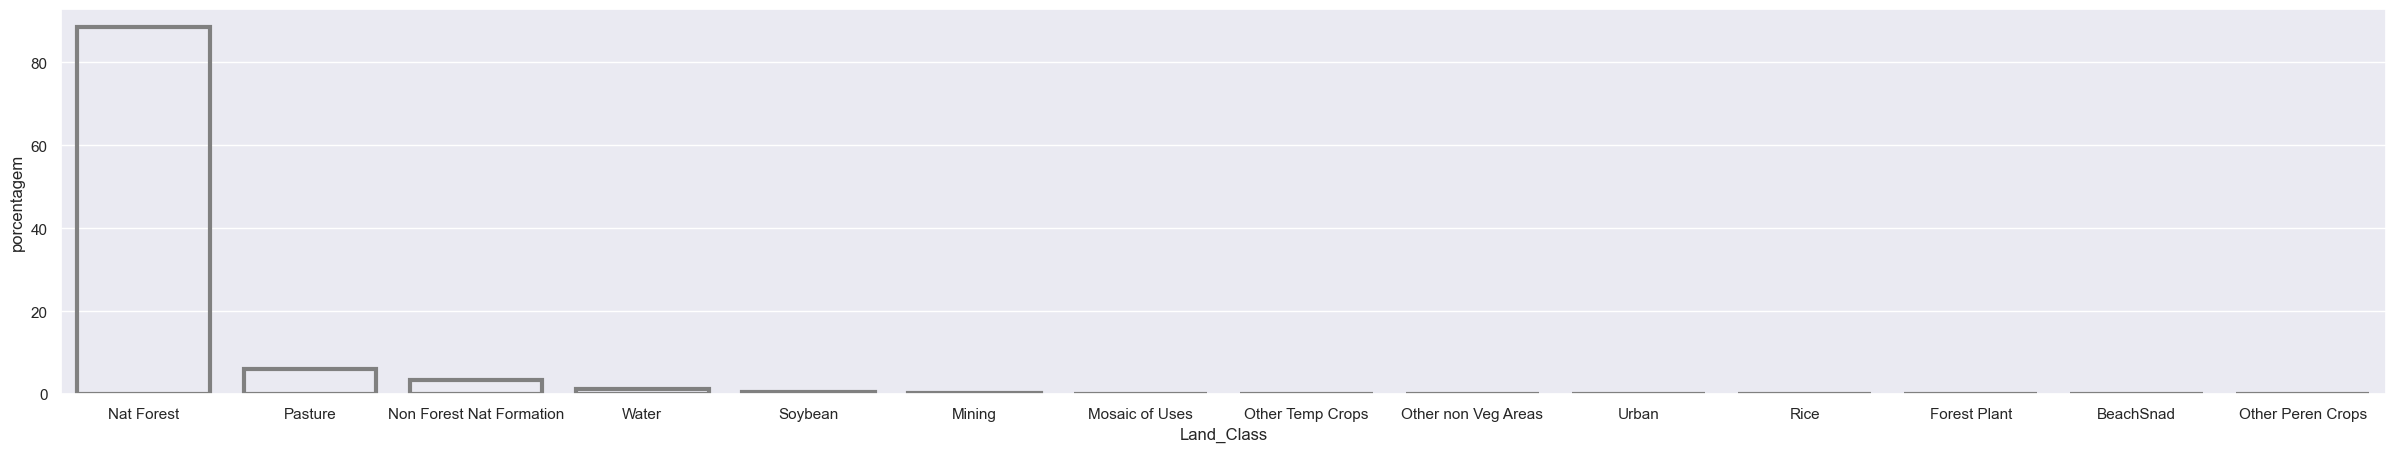

In [3]:
#For BySum_Area
#Creating a unique DataFrame for all classes of Land Tenure
dict_value = {3:"Nat Forest",4:'Nat Forest',9:'Forest Plant',11:'Non Forest Nat Formation',12:'Non Forest Nat Formation',15:'Pasture',24:'Urban',30:'Mining',33:'Water',41:'Other Temp Crops',21:'Mosaic of Uses',25:'Other non Veg Areas',39:'Soybean',62:'Cotton',20:'Sugar cane ',29:'Non Forest Nat Formation',
              0:float('NaN'),5:'Natural Forest',23:'BeachSnad',32:'Non Forest Nat Formation',40:'Rice',48:'Other Peren Crops'}
#Creating list with files!
list_files = glob.glob(wd+uso_solo+"BySUM_Area/Tables/*.csv")
#Reading all dataframes and merging
pd_list_3 = []
for i in range(len(list_files)):
    pd_list_3.append(pd.read_csv(list_files[i],sep = ';'))
pd_merge_3 =pd.concat(pd_list_3)

#Creating a column with that class value
pd_merge_3["Land_Class"] = pd_merge_3['Value'].map(dict_value)
pd_merge_3 =  pd_merge_3[pd_merge_3.Value != 0]
#Reseting and del index col
pd_merge_3.reset_index(inplace=True)
del pd_merge_3['index']

#Passing count column from str to numeric
pd_merge_3['Count'] = pd_merge_3['Count'].str.replace(",",".").astype(float)

#Creating a merged dataframe and creating a column with %
data_merged_3 = pd_merge_3.groupby('Land_Class',as_index = False)['Count'].sum().sort_values('Count',ascending = False)
sum_values_3 = pd_merge_3['Count'].sum()
data_merged_3['porcentagem'] = (data_merged_3['Count'] / sum_values_3)*100

y = sns.barplot(
    data=data_merged_3, x=data_merged_3.Land_Class, y="porcentagem", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)

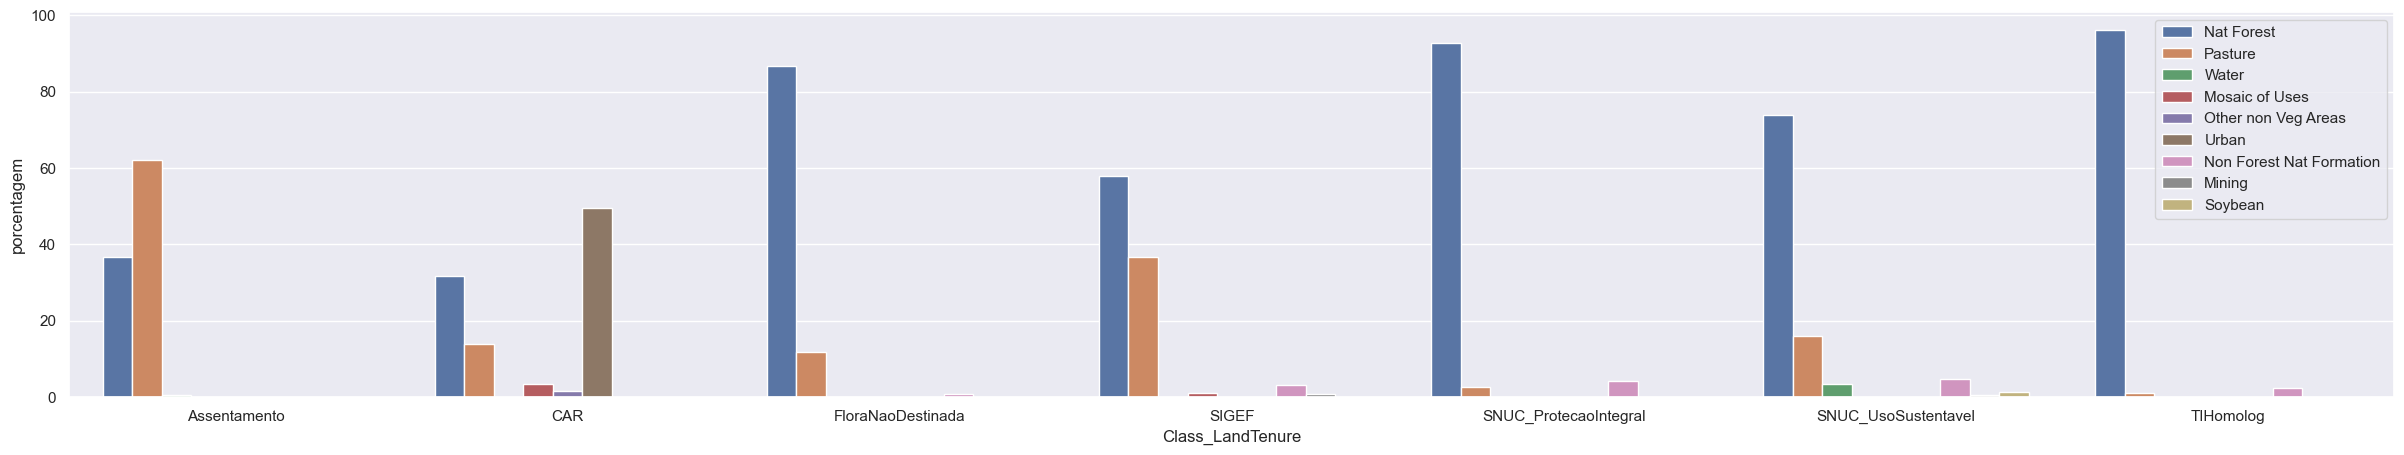

In [14]:
#Working with the diferent classes of landTenure
#Creating list with files!
list_files = glob.glob(wd+uso_solo+"BySUM_Area/Tables/*.csv")

dict_value = {3:"Nat Forest",4:'Nat Forest',9:'Forest Plant',11:'Non Forest Nat Formation',12:'Non Forest Nat Formation',15:'Pasture',24:'Urban',30:'Mining',33:'Water',41:'Other Temp Crops',21:'Mosaic of Uses',25:'Other non Veg Areas',39:'Soybean',62:'Cotton',20:'Sugar cane ',29:'Non Forest Nat Formation',
              0:float('NaN'),5:'Natural Forest',23:'BeachSnad',32:'Non Forest Nat Formation',40:'Rice',48:'Other Peren Crops'}


#Reading all dataframes and merging
pd_list_2 = []
for i in range(len(list_files)):
    if 'Assentamento' in list_files[i]:
        assentamento = pd.read_csv(list_files[i],sep = ';')
        assentamento['Class_LandTenure'] = 'Assentamento'
        assentamento['Count'] = assentamento['Count'].str.replace(",",".").astype(float)
        assentamento["Land_Class"] = assentamento['Value'].map(dict_value)
        assentamento = assentamento[assentamento.Value != 0]
        assentamento['porcentagem'] = (assentamento['Count'] / assentamento['Count'].sum())*100
       
               
        
    elif 'CAR_By_SUM' in list_files[i]:
        car = pd.read_csv(list_files[i],sep = ';')
        car['Class_LandTenure'] = 'CAR'
        car['Count'] = car['Count'].str.replace(",",".").astype(float)
        car["Land_Class"] = car['Value'].map(dict_value)
        car = car[car.Value != 0]
        car['porcentagem'] = (car['Count'] / car['Count'].sum())*100
        
    elif 'FloraNaoDestinada' in list_files[i]:
        FloraNaoDestinada = pd.read_csv(list_files[i],sep = ';')
        FloraNaoDestinada['Class_LandTenure'] = 'FloraNaoDestinada'
        FloraNaoDestinada['Count'] = FloraNaoDestinada['Count'].str.replace(",",".").astype(float)
        FloraNaoDestinada["Land_Class"] = FloraNaoDestinada['Value'].map(dict_value)
        FloraNaoDestinada = FloraNaoDestinada[FloraNaoDestinada.Value != 0]
        FloraNaoDestinada['porcentagem'] = (FloraNaoDestinada['Count'] / FloraNaoDestinada['Count'].sum())*100
        
    elif 'SIGEF' in list_files[i]:
        SIGEF = pd.read_csv(list_files[i],sep = ';')
        SIGEF['Class_LandTenure'] = 'SIGEF'
        SIGEF['Count'] = SIGEF['Count'].str.replace(",",".").astype(float)
        SIGEF["Land_Class"] = SIGEF['Value'].map(dict_value)
        SIGEF = SIGEF[SIGEF.Value != 0]
        SIGEF['porcentagem'] = (SIGEF['Count'] / SIGEF['Count'].sum())*100
        
    elif 'SNUC_ProtecaoIntegral' in list_files[i]:
        SNUC_ProtecaoIntegral = pd.read_csv(list_files[i],sep = ';')
        SNUC_ProtecaoIntegral['Class_LandTenure'] = 'SNUC_ProtecaoIntegral'
        SNUC_ProtecaoIntegral['Count'] = SNUC_ProtecaoIntegral['Count'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral["Land_Class"] = SNUC_ProtecaoIntegral['Value'].map(dict_value)
        SNUC_ProtecaoIntegral = SNUC_ProtecaoIntegral[SNUC_ProtecaoIntegral.Value != 0]
        SNUC_ProtecaoIntegral['porcentagem'] = (SNUC_ProtecaoIntegral['Count'] / SNUC_ProtecaoIntegral['Count'].sum())*100
        
    elif 'SNUC_UsoSustentavel' in list_files[i]:
        SNUC_UsoSustentavel = pd.read_csv(list_files[i],sep = ';')
        SNUC_UsoSustentavel['Class_LandTenure'] = 'SNUC_UsoSustentavel'
        SNUC_UsoSustentavel['Count'] = SNUC_UsoSustentavel['Count'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel["Land_Class"] = SNUC_UsoSustentavel['Value'].map(dict_value)
        SNUC_UsoSustentavel = SNUC_UsoSustentavel[SNUC_UsoSustentavel.Value != 0]
        SNUC_UsoSustentavel['porcentagem'] = (SNUC_UsoSustentavel['Count'] / SNUC_UsoSustentavel['Count'].sum())*100
        
    elif 'TIHomolog' in list_files[i]:
        TIHomolog = pd.read_csv(list_files[i],sep = ';')
        TIHomolog['Class_LandTenure'] = 'TIHomolog'
        TIHomolog['Count'] = TIHomolog['Count'].str.replace(",",".").astype(float)
        TIHomolog["Land_Class"] = TIHomolog['Value'].map(dict_value)
        TIHomolog = TIHomolog[TIHomolog.Value != 0]
        TIHomolog['porcentagem'] = (TIHomolog['Count'] / TIHomolog['Count'].sum())*100
        
df_merged_2 = pd.concat([assentamento,car,FloraNaoDestinada,SIGEF,SNUC_ProtecaoIntegral,SNUC_UsoSustentavel,TIHomolog])


#Reseting and del index col
df_merged_2.reset_index(inplace=True)
del df_merged_2['index']
df_grouped = df_merged_2.groupby(['Class_LandTenure','Land_Class'],as_index=False)['porcentagem'].sum()

sns.barplot(data=df_grouped.query('porcentagem > 0.5'), x="Class_LandTenure", y="porcentagem", hue="Land_Class")
plt.legend(loc='upper right')

### Working with Alertas MapBiomes BySum

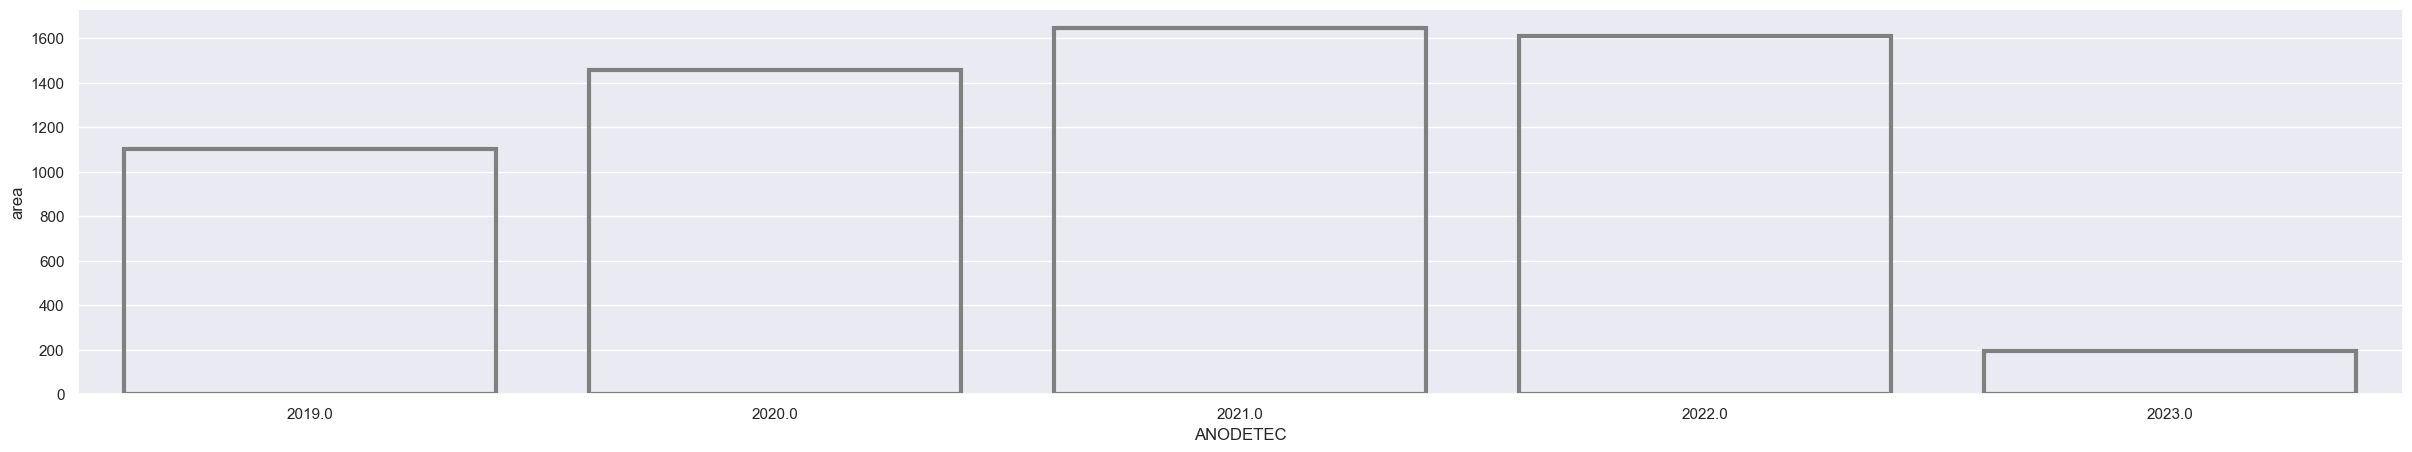

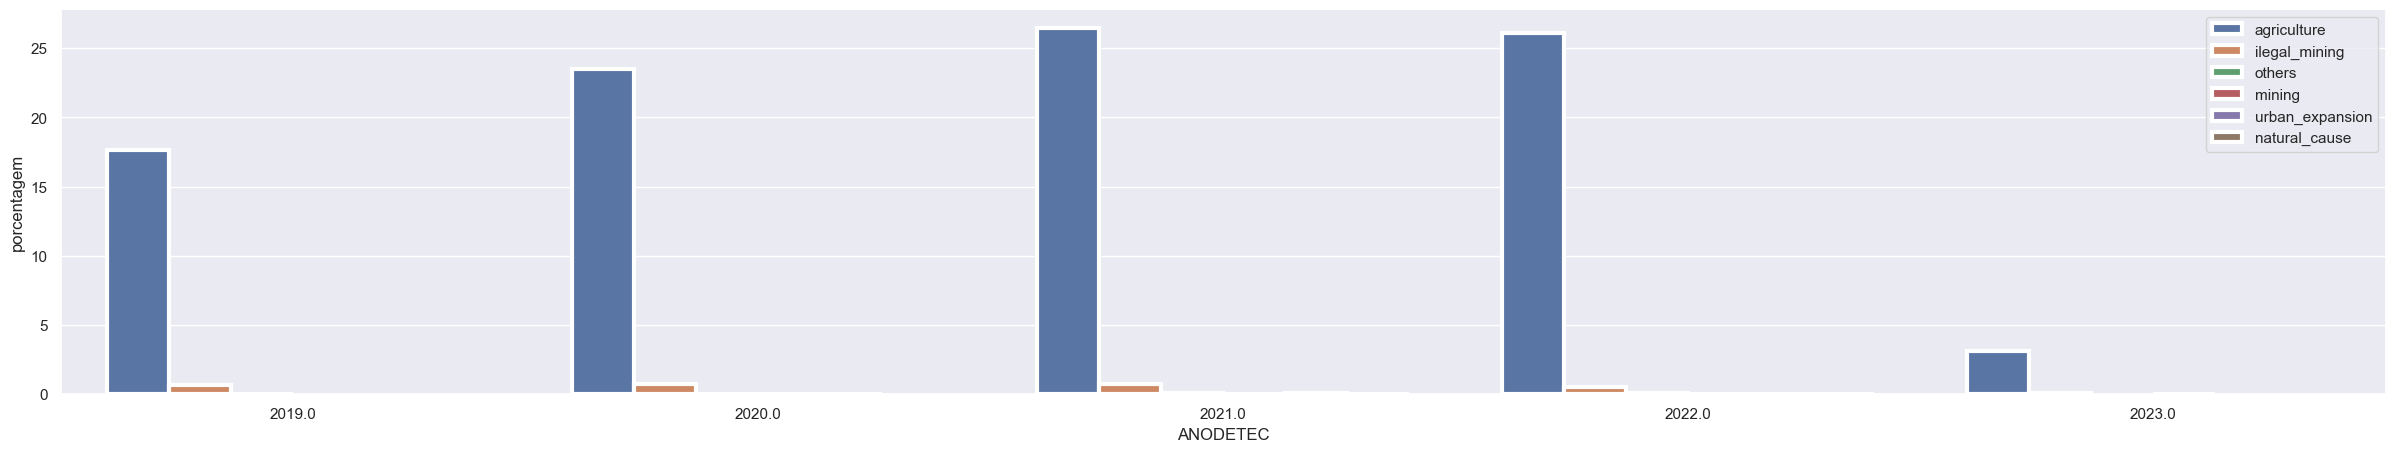

In [26]:
#For BySum
#Creating a unique DataFrame for all classes of Land Tenure

#Creating list with files!
list_files = glob.glob(wd+alertas+"By_Sum/Table/*.csv")
pd_list_alerta = []
for i in range(len(list_files)):
    pd_list_alerta.append(pd.read_csv(list_files[i],sep = ';'))
pd_merge_alerta =pd.concat(pd_list_alerta)



#Passing area column from str to numeric
pd_merge_alerta['area'] = pd_merge_alerta['area'].str.replace(",",".").astype(float)
pd_merge_alerta['ANODETEC'] = pd_merge_alerta['ANODETEC'].str.replace(",",".").astype(float)
pd_merge_alerta['porcentagem'] = (pd_merge_alerta['area'] / pd_merge_alerta['area'].sum())*100

pd_grouped = pd_merge_alerta.groupby('ANODETEC',as_index=False).area.sum()
#ploting
y = sns.barplot(
    data=pd_grouped, x=pd_grouped.ANODETEC, y="area", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
plt.show()
pd_grouped_2 = pd_merge_alerta.groupby(['ANODETEC','VPRESSAO'],as_index=False)['porcentagem'].sum()
v = sns.barplot(
    data=pd_grouped_2, x=pd_grouped_2.ANODETEC, y="porcentagem",hue='VPRESSAO', capsize=2,
    linewidth=3
)
plt.legend(loc='upper right')
plt.show()

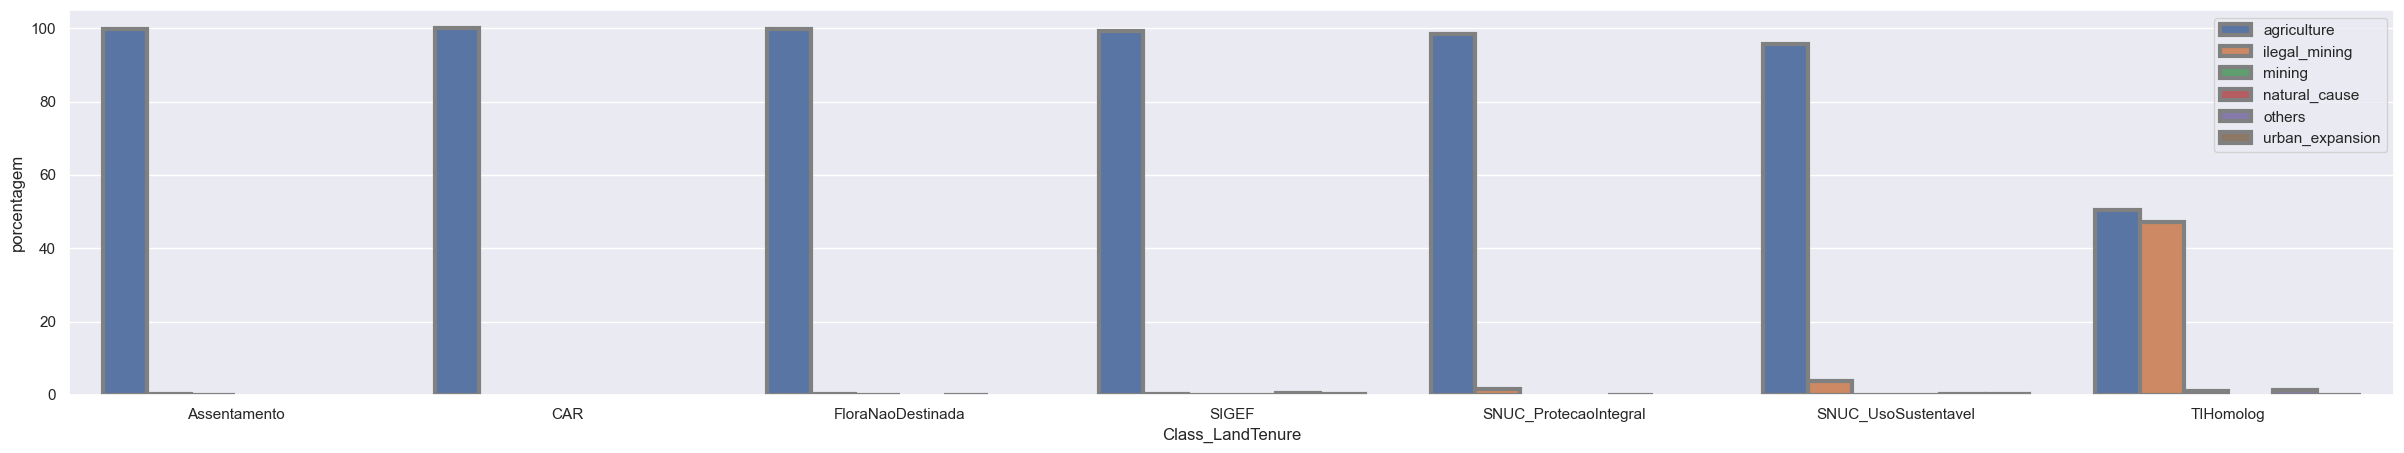

In [28]:
#Working with the diferent classes of landTenure
#Creating list with files!
list_files = glob.glob(wd+alertas+"By_Sum/Table/*.csv")




#Reading all dataframes and merging

for i in range(len(list_files)):
    if 'Assentamento' in list_files[i]:
        assentamento2 = pd.read_csv(list_files[i],sep = ';')
        assentamento2['Class_LandTenure'] = 'Assentamento'
        assentamento2['area'] = assentamento2['area'].str.replace(",",".").astype(float)
        assentamento2['ANODETEC'] = assentamento2['ANODETEC'].str.replace(",",".").astype(float)
        assentamento2['porcentagem'] = (assentamento2['area'] / assentamento2['area'].sum())*100
               
        
    elif 'CAR' in list_files[i]:
        car2 = pd.read_csv(list_files[i],sep = ';')
        car2['Class_LandTenure'] = 'CAR'
        car2['area'] = car2['area'].str.replace(",",".").astype(float)
        car2['ANODETEC'] = car2['ANODETEC'].str.replace(",",".").astype(float)
        car2['porcentagem'] = (car2['area'] / car2['area'].sum())*100
      
        
    elif 'Flora_Nao_Destinada' in list_files[i]:
        FloraNaoDestinada2 = pd.read_csv(list_files[i],sep = ';')
        FloraNaoDestinada2['Class_LandTenure'] = 'FloraNaoDestinada'
        FloraNaoDestinada2['area'] = FloraNaoDestinada2['area'].str.replace(",",".").astype(float)
        FloraNaoDestinada2['ANODETEC'] = FloraNaoDestinada2['ANODETEC'].str.replace(",",".").astype(float)
        FloraNaoDestinada2['porcentagem'] = (FloraNaoDestinada2['area'] / FloraNaoDestinada2['area'].sum())*100
        
    elif 'SIGEF' in list_files[i]:
        SIGEF2 = pd.read_csv(list_files[i],sep = ';')
        SIGEF2['Class_LandTenure'] = 'SIGEF'
        SIGEF2['area'] = SIGEF2['area'].str.replace(",",".").astype(float)
        SIGEF2['ANODETEC'] = SIGEF2['ANODETEC'].str.replace(",",".").astype(float)
        SIGEF2['porcentagem'] = (SIGEF2['area'] / SIGEF2['area'].sum())*100
        
    elif 'SNUC_ProtInt' in list_files[i]:
        SNUC_ProtecaoIntegral2 = pd.read_csv(list_files[i],sep = ';')
        SNUC_ProtecaoIntegral2['Class_LandTenure'] = 'SNUC_ProtecaoIntegral'
        SNUC_ProtecaoIntegral2['area'] = SNUC_ProtecaoIntegral2['area'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral2['ANODETEC'] = SNUC_ProtecaoIntegral2['ANODETEC'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral2['porcentagem'] = (SNUC_ProtecaoIntegral2['area'] / SNUC_ProtecaoIntegral2['area'].sum())*100
        
        
    elif 'SNUC_UsoSUS' in list_files[i]:
        SNUC_UsoSustentavel2 = pd.read_csv(list_files[i],sep = ';')
        SNUC_UsoSustentavel2['Class_LandTenure'] = 'SNUC_UsoSustentavel'
        SNUC_UsoSustentavel2['area'] = SNUC_UsoSustentavel2['area'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel2['ANODETEC'] = SNUC_UsoSustentavel2['ANODETEC'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel2['porcentagem'] = (SNUC_UsoSustentavel2['area'] / SNUC_UsoSustentavel2['area'].sum())*100
        
        
    elif 'TIHomolog' in list_files[i]:
        TIHomolog2 = pd.read_csv(list_files[i],sep = ';')
        TIHomolog2['Class_LandTenure'] = 'TIHomolog'
        TIHomolog2['area'] = TIHomolog2['area'].str.replace(",",".").astype(float)
        TIHomolog2['ANODETEC'] = TIHomolog2['ANODETEC'].str.replace(",",".").astype(float)
        TIHomolog2['porcentagem'] = (TIHomolog2['area'] / TIHomolog2['area'].sum())*100
        
        
df_merged_4 = pd.concat([assentamento2,car2,FloraNaoDestinada2,SIGEF2,SNUC_ProtecaoIntegral2,SNUC_UsoSustentavel2,TIHomolog2])

pd_grouped_2 = df_merged_4.groupby(['VPRESSAO','Class_LandTenure'],as_index=False)['porcentagem'].sum()
v = sns.barplot(
    data=pd_grouped_2, x=pd_grouped_2.Class_LandTenure, y="porcentagem",hue='VPRESSAO', capsize=1, errcolor=".5",
    linewidth=3, edgecolor=".5"
)
plt.legend(loc='upper right')
plt.show()



### Working with mapbiomes alertas BySUM_Area

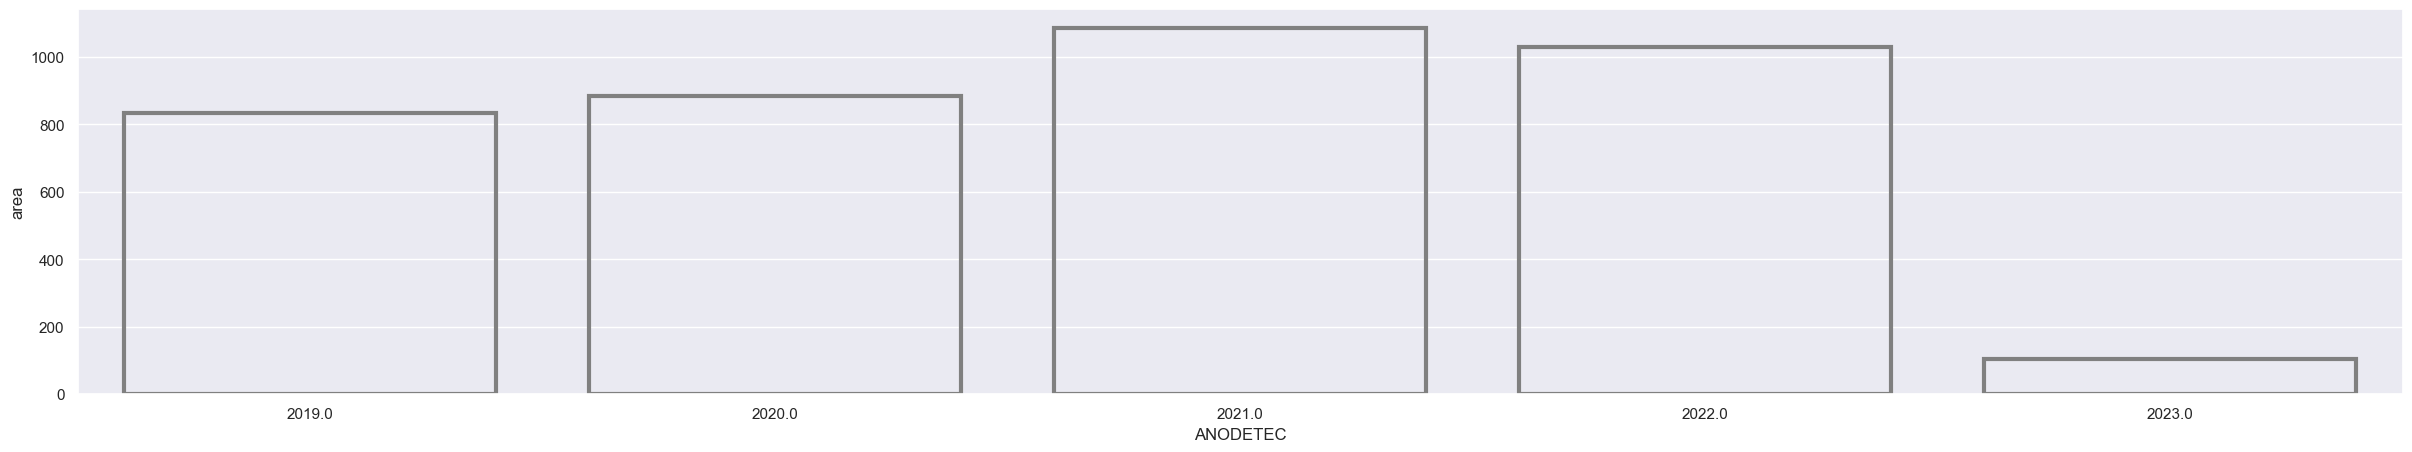

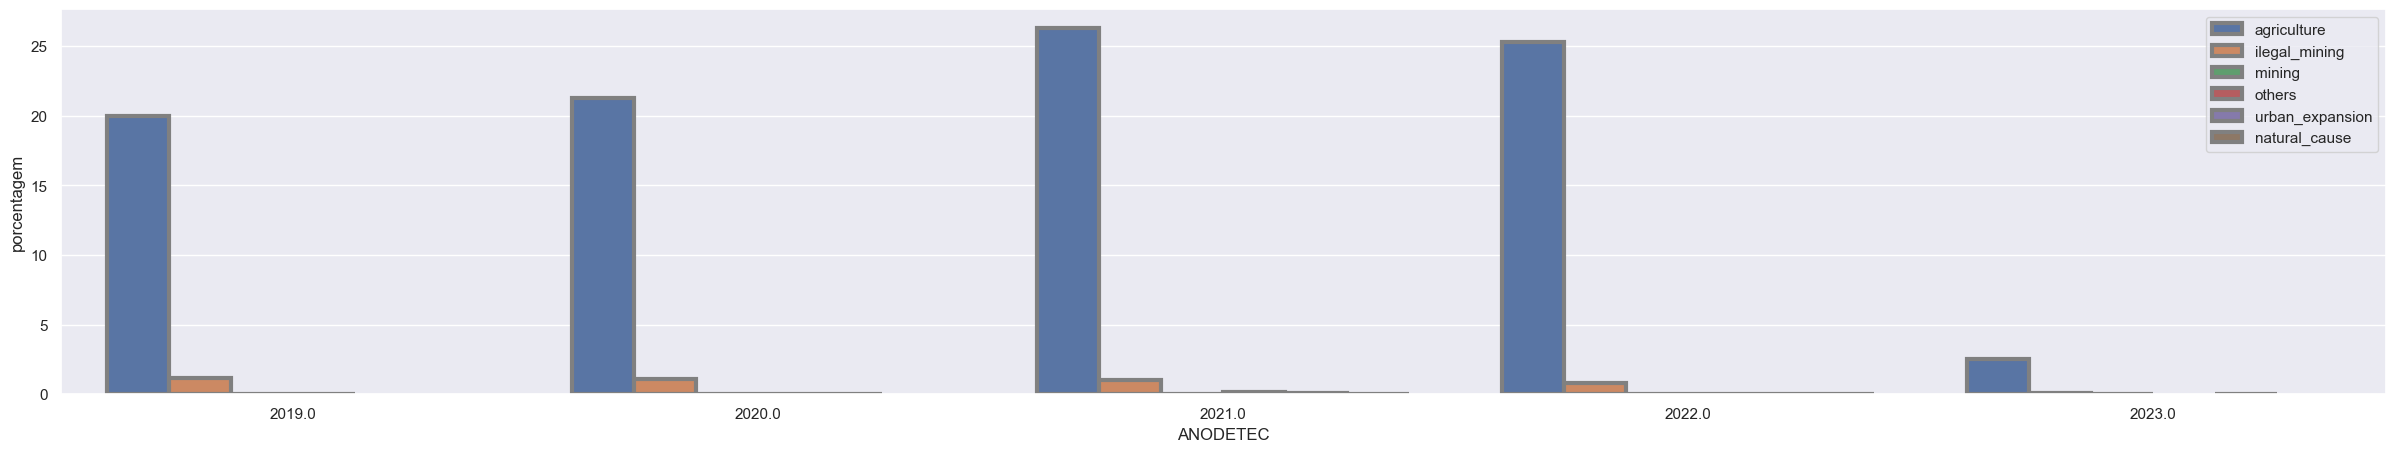

In [30]:
#For BySum area
#Creating a unique DataFrame for all classes of Land Tenure

#Creating list with files!
list_files2 = glob.glob(wd+alertas+"BySUM_Area/Table/*.csv")

pd_list_alerta2 = []
for i in range(len(list_files2)):
    pd_list_alerta2.append(pd.read_csv(list_files2[i],sep = ';'))
pd_merge_alerta2 =pd.concat(pd_list_alerta2)


#Passing area column from str to numeric
pd_merge_alerta2['area'] = pd_merge_alerta2['area'].str.replace(",",".").astype(float)
pd_merge_alerta2['ANODETEC'] = pd_merge_alerta2['ANODETEC'].str.replace(",",".").astype(float)
pd_merge_alerta2['porcentagem'] = (pd_merge_alerta2['area'] / pd_merge_alerta2['area'].sum())*100
pd_grouped2 = pd_merge_alerta2.groupby('ANODETEC',as_index=False).area.sum()
#ploting
y = sns.barplot(
    data=pd_grouped2, x=pd_grouped2.ANODETEC, y="area", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
plt.show()

pd_grouped_3 = pd_merge_alerta2.groupby(['ANODETEC','VPRESSAO'],as_index=False)['porcentagem'].sum()
v = sns.barplot(
    data=pd_grouped_3, x=pd_grouped_3.ANODETEC, y="porcentagem",hue='VPRESSAO', capsize=1, errcolor=".5",
    linewidth=3, edgecolor=".5"
)
plt.legend(loc='upper right')
plt.show()

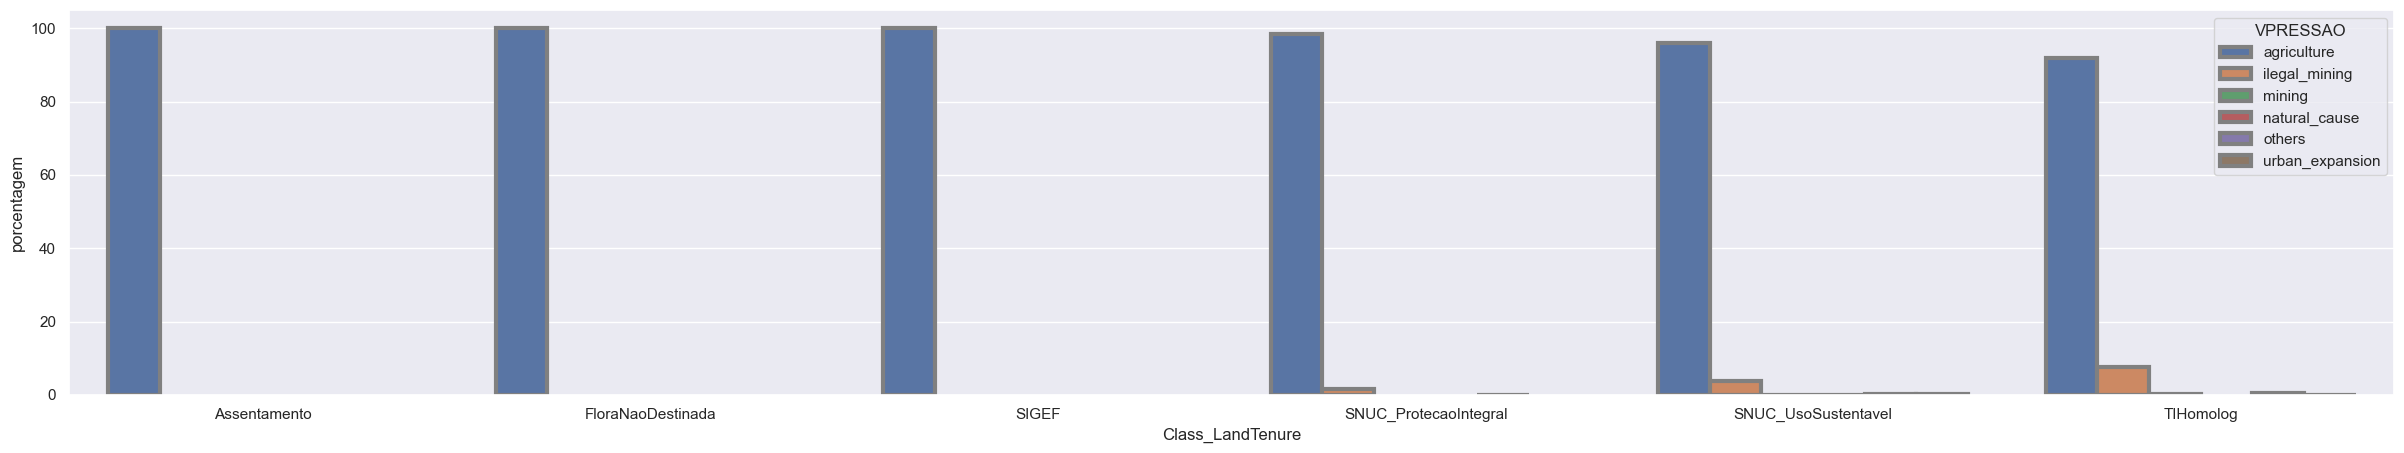

In [32]:
#Working with the diferent classes of landTenure
#Creating list with files!
list_files3 = glob.glob(wd+alertas+"BySUM_Area/Table/*.csv")


for i in range(len(list_files3)):
    if 'Assentamento' in list_files3[i]:
        assentamento3 = pd.read_csv(list_files3[i],sep = ';')
        assentamento3['Class_LandTenure'] = 'Assentamento'
        assentamento3['area'] = assentamento3['area'].str.replace(",",".").astype(float)
        assentamento3['ANODETEC'] = assentamento3['ANODETEC'].str.replace(",",".").astype(float)
        assentamento3['porcentagem'] = (assentamento3['area'] / assentamento3['area'].sum())*100
    
    elif 'Flora_Nao_Destinada' in list_files3[i]:
        FloraNaoDestinada3 = pd.read_csv(list_files3[i],sep = ';')
        FloraNaoDestinada3['Class_LandTenure'] = 'FloraNaoDestinada'
        FloraNaoDestinada3['area'] = FloraNaoDestinada3['area'].str.replace(",",".").astype(float)
        FloraNaoDestinada3['ANODETEC'] = FloraNaoDestinada3['ANODETEC'].str.replace(",",".").astype(float)
        FloraNaoDestinada3['porcentagem'] = (FloraNaoDestinada3['area'] / FloraNaoDestinada3['area'].sum())*100
    elif 'SIGEF' in list_files3[i]:
        SIGEF3 = pd.read_csv(list_files3[i],sep = ';')
        SIGEF3['Class_LandTenure'] = 'SIGEF'
        SIGEF3['area'] = SIGEF3['area'].str.replace(",",".").astype(float)
        SIGEF3['ANODETEC'] = SIGEF3['ANODETEC'].str.replace(",",".").astype(float)
        SIGEF3['porcentagem'] = (SIGEF3['area'] / SIGEF3['area'].sum())*100
        
    elif 'SNUC_ProtInt' in list_files3[i]:
        SNUC_ProtecaoIntegral3 = pd.read_csv(list_files3[i],sep = ';')
        SNUC_ProtecaoIntegral3['Class_LandTenure'] = 'SNUC_ProtecaoIntegral'
        SNUC_ProtecaoIntegral3['area'] = SNUC_ProtecaoIntegral3['area'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral3['ANODETEC'] = SNUC_ProtecaoIntegral3['ANODETEC'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral3['porcentagem'] = (SNUC_ProtecaoIntegral3['area'] / SNUC_ProtecaoIntegral3['area'].sum())*100
        
        
    elif 'SNUC_UsoSUS' in list_files3[i]:
        SNUC_UsoSustentavel3 = pd.read_csv(list_files3[i],sep = ';')
        SNUC_UsoSustentavel3['Class_LandTenure'] = 'SNUC_UsoSustentavel'
        SNUC_UsoSustentavel3['area'] = SNUC_UsoSustentavel3['area'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel3['ANODETEC'] = SNUC_UsoSustentavel3['ANODETEC'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel3['porcentagem'] = (SNUC_UsoSustentavel3['area'] / SNUC_UsoSustentavel3['area'].sum())*100
        
        
    elif 'TIHomolog' in list_files3[i]:
        TIHomolog3 = pd.read_csv(list_files3[i],sep = ';')
        TIHomolog3['Class_LandTenure'] = 'TIHomolog'
        TIHomolog3['area'] = TIHomolog3['area'].str.replace(",",".").astype(float)
        TIHomolog3['ANODETEC'] = TIHomolog3['ANODETEC'].str.replace(",",".").astype(float)
        TIHomolog3['porcentagem'] = (TIHomolog3['area'] / TIHomolog3['area'].sum())*100
        
        
df_merged_5 = pd.concat([assentamento3,FloraNaoDestinada3,SIGEF3,SNUC_ProtecaoIntegral3,SNUC_UsoSustentavel3,TIHomolog3])

pd_grouped_5 = df_merged_5.groupby(['VPRESSAO','Class_LandTenure'],as_index=False)['porcentagem'].sum()
v = sns.barplot(
    data=pd_grouped_5, x=pd_grouped_5.Class_LandTenure, y="porcentagem",hue='VPRESSAO', capsize=1, errcolor=".5",
    linewidth=3, edgecolor=".5"
)
plt.show()
        

        

### Working with prodes By SUM

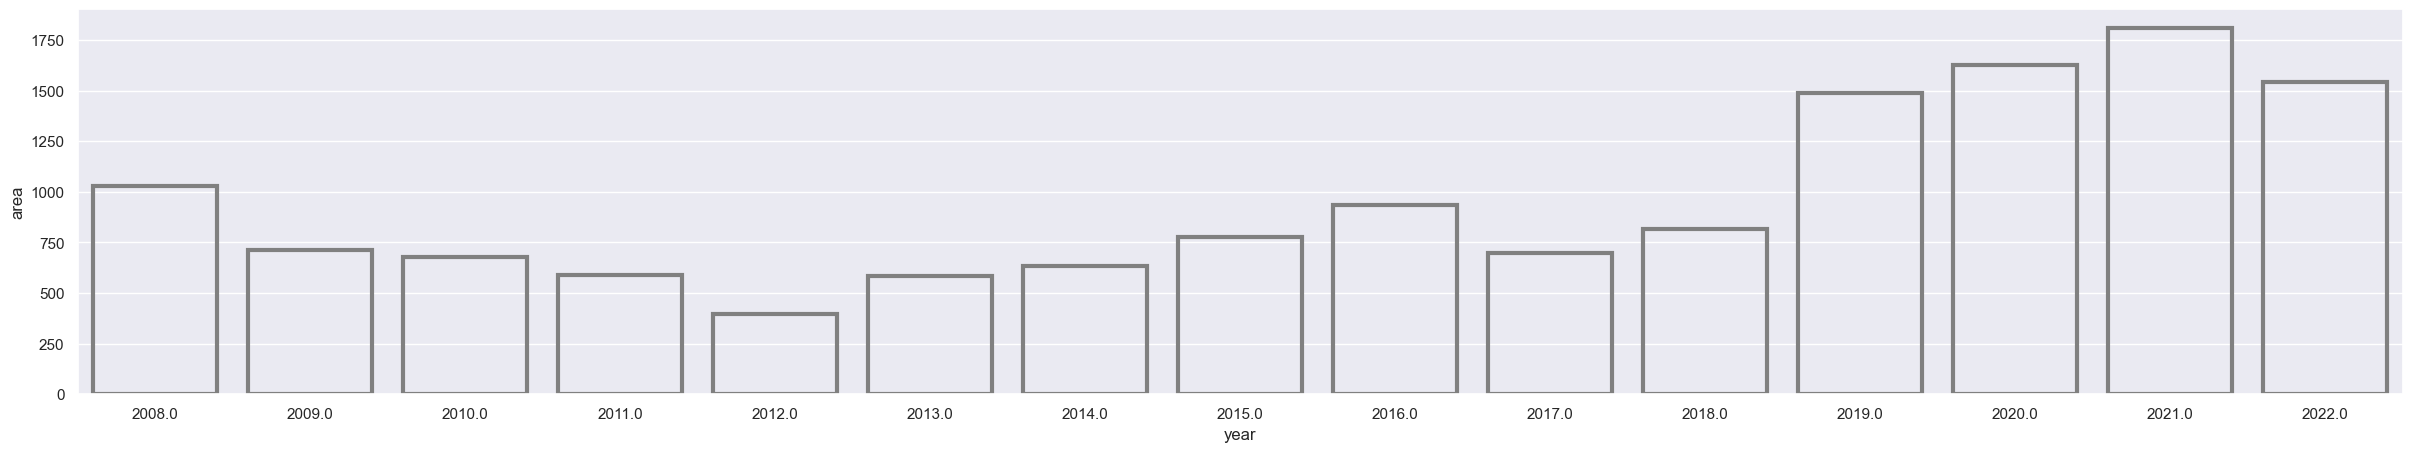

,OID_,fid_1,state,path_row,main_class,class_name,def_cloud,julian_day,image_date,year,area_km,scene_id,source,satellite,sensor,area,porcentagem
0,0,2361,PA,22561,DESMATAMENTO,d2019,"2013,000000000000000","255,000000000000000",12/09/2019 00:00:00,2019.0,"0,000089276806891","164,000000000000000",,,,0.000089,6.234173e-07
1,1,265,PA,22564,DESMATAMENTO,d2020,"0,000000000000000","258,000000000000000",14/09/2020 00:00:00,2020.0,"0,310854983515706","518,000000000000000",,,,0.310855,2.170692e-03
2,2,313,PA,22564,DESMATAMENTO,d2019,"0,000000000000000","223,000000000000000",11/08/2019 00:00:00,2019.0,"0,068062121327825","27,000000000000000",,,,0.068062,4.752759e-04
3,3,406,PA,22564,DESMATAMENTO,d2020,"0,000000000000000","258,000000000000000",14/09/2020 00:00:00,2020.0,"0,128602992289982","518,000000000000000",,,,0.128603,8.980310e-04
4,4,488,PA,22564,DESMATAMENTO,d2020,"0,000000000000000","258,000000000000000",14/09/2020 00:00:00,2020.0,"0,204722393588288","518,000000000000000",,,,0.204723,1.429572e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1237,628508,PA,22565,DESMATAMENTO,d2013,"0,000000000000000","222,000000000000000",10/08/2013 00:00:00,2013.0,"0,079502157250659","2057,000000000000000",,,,0.079502,5.551615e-04
1238,1238,628511,PA,22565,DESMATAMENTO,d2013,"0,000000000000000","222,000000000000000",10/08/2013 00:00:00,2013.0,"0,170501891567573","2057,000000000000000",,,,0.170502,1.190610e-03
1239,1239,628584,PA,22565,DESMATAMENTO,d2013,"0,000000000000000","222,000000000000000",10/08/2013 00:00:00,2013.0,"0,111355751163679","2057,000000000000000",,,,0.111356,7.775940e-04
1240,1240,628597,PA,22565,DESMATAMENTO,d2013,"0,000000000000000","222,000000000000000",10/08/2013 00:00:00,2013.0,"0,594781210774825","2057,000000000000000",,,,0.594781,4.153340e-03


In [33]:
#For BySum
#Creating a unique DataFrame for all classes of Land Tenure

#Creating list with files!
list_files = glob.glob(wd+prodes+"BySum/Tables/*.csv")

pd_list_prodes = []
for i in range(len(list_files)):
    pd_list_prodes.append(pd.read_csv(list_files[i],sep = ';'))
pd_merge_prodes =pd.concat(pd_list_prodes)
#Passing area column from str to numeric
pd_merge_prodes['area'] = pd_merge_prodes['area'].str.replace(",",".").astype(float)
pd_merge_prodes['year'] = pd_merge_prodes['year'].str.replace(",",".").astype(float)
pd_merge_prodes['porcentagem'] = (pd_merge_prodes['area'] / pd_merge_prodes['area'].sum())*100
pd_grouped = pd_merge_prodes.groupby('year',as_index=False).area.sum()
y = sns.barplot(
    data=pd_grouped, x=pd_grouped.year, y="area", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)

plt.show()
pd_merge_prodes

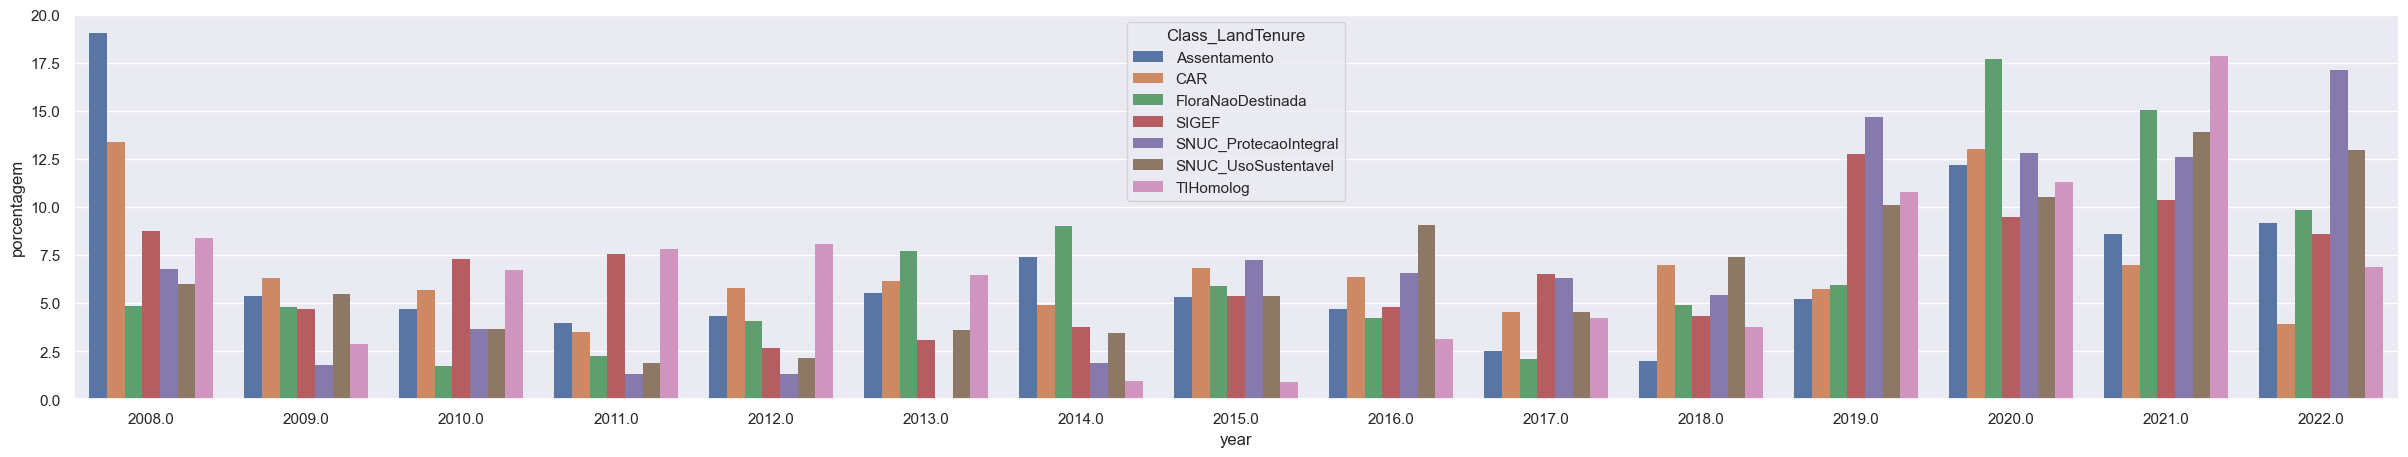

In [42]:
#Working with the diferent classes of landTenure
#Creating list with files!
list_files = glob.glob(wd+prodes+"BySum/Tables/*.csv")


#Reading all dataframes and merging

for i in range(len(list_files)):
    if 'Assentamento' in list_files[i]:
        assentamento2 = pd.read_csv(list_files[i],sep = ';')
        assentamento2['Class_LandTenure'] = 'Assentamento'
        assentamento2['area'] = assentamento2['area'].str.replace(",",".").astype(float)
        assentamento2['year'] = assentamento2['year'].str.replace(",",".").astype(float)
        assentamento2['porcentagem'] = (assentamento2['area'] / assentamento2['area'].sum())*100
               
        
    elif 'CAR' in list_files[i]:
        car2 = pd.read_csv(list_files[i],sep = ';')
        car2['Class_LandTenure'] = 'CAR'
        car2['area'] = car2['area'].str.replace(",",".").astype(float)
        car2['year'] = car2['year'].str.replace(",",".").astype(float)
        car2['porcentagem'] = (car2['area'] / car2['area'].sum())*100
      
        
    elif 'Flora_Nao_Destinada' in list_files[i]:
        FloraNaoDestinada2 = pd.read_csv(list_files[i],sep = ';')
        FloraNaoDestinada2['Class_LandTenure'] = 'FloraNaoDestinada'
        FloraNaoDestinada2['area'] = FloraNaoDestinada2['area'].str.replace(",",".").astype(float)
        FloraNaoDestinada2['year'] = FloraNaoDestinada2['year'].str.replace(",",".").astype(float)
        FloraNaoDestinada2['porcentagem'] = (FloraNaoDestinada2['area'] / FloraNaoDestinada2['area'].sum())*100
        
    elif 'SIGEF' in list_files[i]:
        SIGEF2 = pd.read_csv(list_files[i],sep = ';')
        SIGEF2['Class_LandTenure'] = 'SIGEF'
        SIGEF2['area'] = SIGEF2['area'].str.replace(",",".").astype(float)
        SIGEF2['year'] = SIGEF2['year'].str.replace(",",".").astype(float)
        SIGEF2['porcentagem'] = (SIGEF2['area'] / SIGEF2['area'].sum())*100
        
    elif 'SNUC_ProtInt' in list_files[i]:
        SNUC_ProtecaoIntegral2 = pd.read_csv(list_files[i],sep = ';')
        SNUC_ProtecaoIntegral2['Class_LandTenure'] = 'SNUC_ProtecaoIntegral'
        SNUC_ProtecaoIntegral2['area'] = SNUC_ProtecaoIntegral2['area'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral2['year'] = SNUC_ProtecaoIntegral2['year'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral2['porcentagem'] = (SNUC_ProtecaoIntegral2['area'] / SNUC_ProtecaoIntegral2['area'].sum())*100
        
        
    elif 'SNUC_UsoSUS' in list_files[i]:
        SNUC_UsoSustentavel2 = pd.read_csv(list_files[i],sep = ';')
        SNUC_UsoSustentavel2['Class_LandTenure'] = 'SNUC_UsoSustentavel'
        SNUC_UsoSustentavel2['area'] = SNUC_UsoSustentavel2['area'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel2['year'] = SNUC_UsoSustentavel2['year'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel2['porcentagem'] = (SNUC_UsoSustentavel2['area'] / SNUC_UsoSustentavel2['area'].sum())*100
        
        
    elif 'TIHomolog' in list_files[i]:
        TIHomolog2 = pd.read_csv(list_files[i],sep = ';')
        TIHomolog2['Class_LandTenure'] = 'TIHomolog'
        TIHomolog2['area'] = TIHomolog2['area'].str.replace(",",".").astype(float)
        TIHomolog2['year'] = TIHomolog2['year'].str.replace(",",".").astype(float)
        TIHomolog2['porcentagem'] = (TIHomolog2['area'] / TIHomolog2['area'].sum())*100
        
        
df_merged_4 = pd.concat([assentamento2,car2,FloraNaoDestinada2,SIGEF2,SNUC_ProtecaoIntegral2,SNUC_UsoSustentavel2,TIHomolog2])

pd_grouped_2 = df_merged_4.groupby(['Class_LandTenure','year'],as_index=False)['porcentagem'].sum()
v = sns.barplot(
    data=pd_grouped_2.query('porcentagem>0.5'), x=pd_grouped_2.year, hue='Class_LandTenure',y="porcentagem",
    linewidth=0
)
plt.show()



### Analise do Prodes BySUM_Area

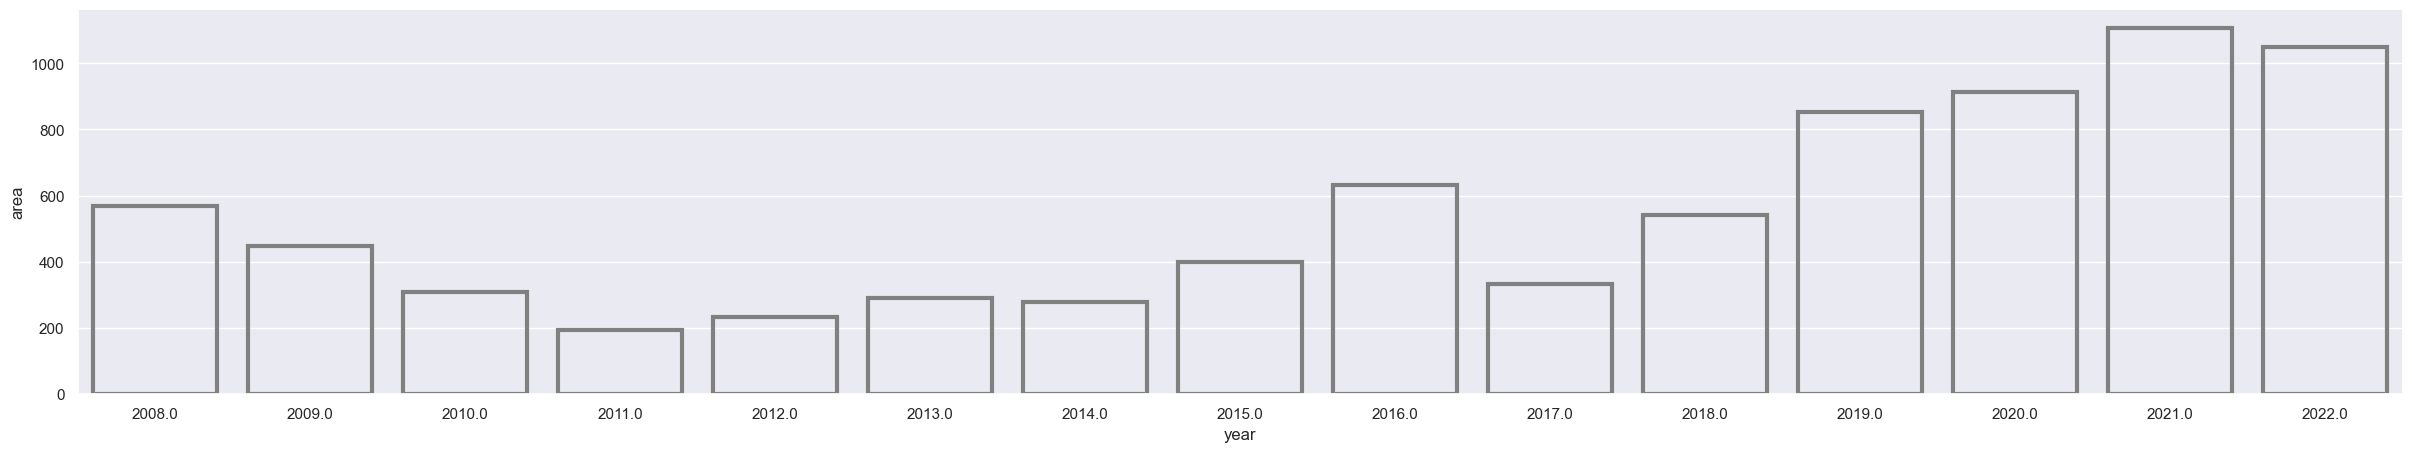

In [27]:
#For BySum
#Creating a unique DataFrame for all classes of Land Tenure

#Creating list with files!
list_files = glob.glob(wd+prodes+"BySUM_Area/Tables/*.csv")

pd_list_prodes = []
for i in range(len(list_files)):
    pd_list_prodes.append(pd.read_csv(list_files[i],sep = ';'))
pd_merge_prodes =pd.concat(pd_list_prodes)
#Passing area column from str to numeric
pd_merge_prodes['area'] = pd_merge_prodes['area'].str.replace(",",".").astype(float)
pd_merge_prodes['year'] = pd_merge_prodes['year'].str.replace(",",".").astype(float)
pd_merge_prodes['porcentagem'] = (pd_merge_prodes['area'] / pd_merge_prodes['area'].sum())*100
pd_grouped = pd_merge_prodes.groupby('year',as_index=False).area.sum()
y = sns.barplot(
    data=pd_grouped, x=pd_grouped.year, y="area", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)

plt.show()


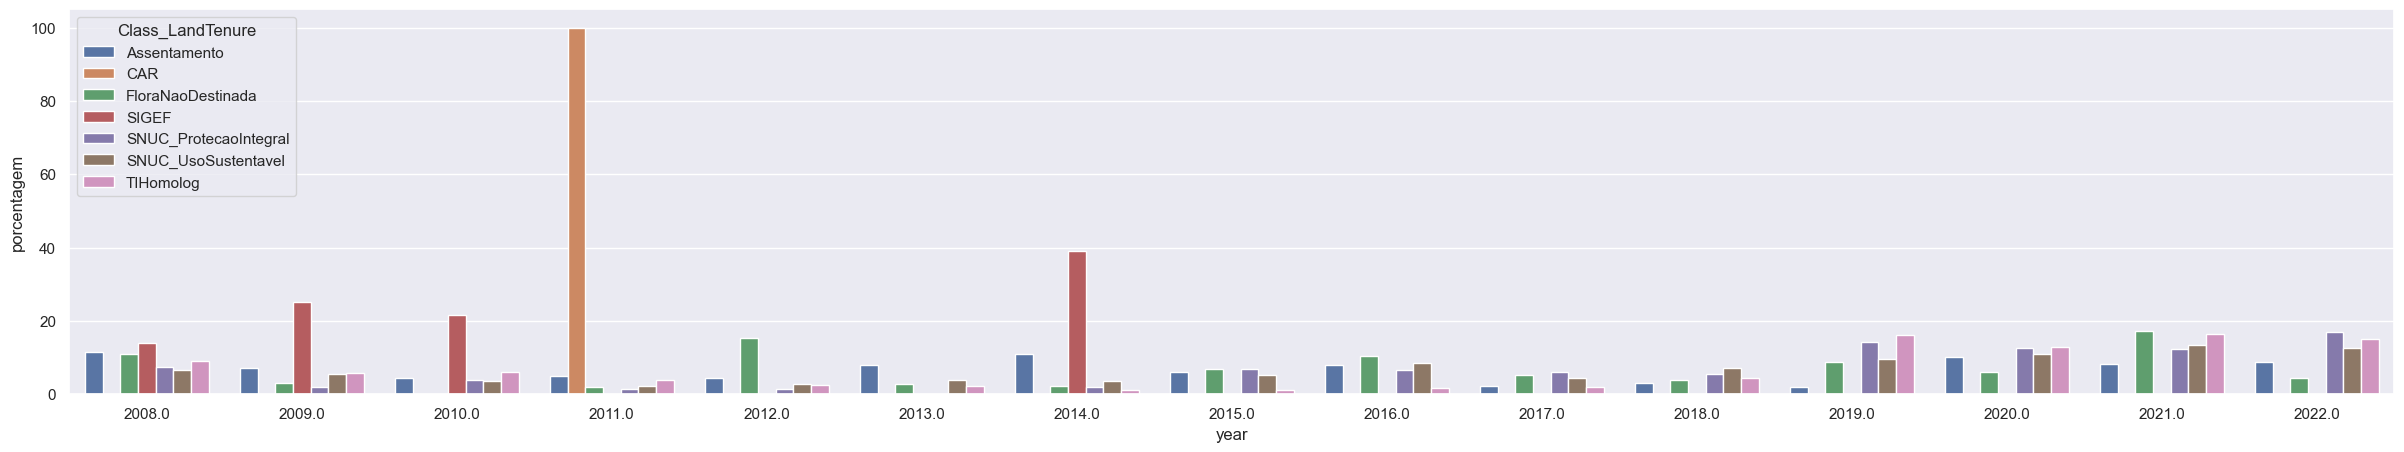

In [43]:
#Working with the diferent classes of landTenure
#Creating list with files!
list_files = glob.glob(wd+prodes+"BySUM_Area/Tables/*.csv")


#Reading all dataframes and merging

for i in range(len(list_files)):
    if 'Assentamento' in list_files[i]:
        assentamento2 = pd.read_csv(list_files[i],sep = ';')
        assentamento2['Class_LandTenure'] = 'Assentamento'
        assentamento2['area'] = assentamento2['area'].str.replace(",",".").astype(float)
        assentamento2['year'] = assentamento2['year'].str.replace(",",".").astype(float)
        assentamento2['porcentagem'] = (assentamento2['area'] / assentamento2['area'].sum())*100
               
        
    elif 'CAR' in list_files[i]:
        car2 = pd.read_csv(list_files[i],sep = ';')
        car2['Class_LandTenure'] = 'CAR'
        car2['area'] = car2['area'].str.replace(",",".").astype(float)
        car2['year'] = car2['year'].str.replace(",",".").astype(float)
        car2['porcentagem'] = (car2['area'] / car2['area'].sum())*100
      
        
    elif 'Flora_Nao_Destinada' in list_files[i]:
        FloraNaoDestinada2 = pd.read_csv(list_files[i],sep = ';')
        FloraNaoDestinada2['Class_LandTenure'] = 'FloraNaoDestinada'
        FloraNaoDestinada2['area'] = FloraNaoDestinada2['area'].str.replace(",",".").astype(float)
        FloraNaoDestinada2['year'] = FloraNaoDestinada2['year'].str.replace(",",".").astype(float)
        FloraNaoDestinada2['porcentagem'] = (FloraNaoDestinada2['area'] / FloraNaoDestinada2['area'].sum())*100
        
    elif 'SIGEF' in list_files[i]:
        SIGEF2 = pd.read_csv(list_files[i],sep = ';')
        SIGEF2['Class_LandTenure'] = 'SIGEF'
        SIGEF2['area'] = SIGEF2['area'].str.replace(",",".").astype(float)
        SIGEF2['year'] = SIGEF2['year'].str.replace(",",".").astype(float)
        SIGEF2['porcentagem'] = (SIGEF2['area'] / SIGEF2['area'].sum())*100
        
    elif 'SNUC_ProtInt' in list_files[i]:
        SNUC_ProtecaoIntegral2 = pd.read_csv(list_files[i],sep = ';')
        SNUC_ProtecaoIntegral2['Class_LandTenure'] = 'SNUC_ProtecaoIntegral'
        SNUC_ProtecaoIntegral2['area'] = SNUC_ProtecaoIntegral2['area'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral2['year'] = SNUC_ProtecaoIntegral2['year'].str.replace(",",".").astype(float)
        SNUC_ProtecaoIntegral2['porcentagem'] = (SNUC_ProtecaoIntegral2['area'] / SNUC_ProtecaoIntegral2['area'].sum())*100
        
        
    elif 'SNUC_UsoSUS' in list_files[i]:
        SNUC_UsoSustentavel2 = pd.read_csv(list_files[i],sep = ';')
        SNUC_UsoSustentavel2['Class_LandTenure'] = 'SNUC_UsoSustentavel'
        SNUC_UsoSustentavel2['area'] = SNUC_UsoSustentavel2['area'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel2['year'] = SNUC_UsoSustentavel2['year'].str.replace(",",".").astype(float)
        SNUC_UsoSustentavel2['porcentagem'] = (SNUC_UsoSustentavel2['area'] / SNUC_UsoSustentavel2['area'].sum())*100
        
        
    elif 'TIHomolog' in list_files[i]:
        TIHomolog2 = pd.read_csv(list_files[i],sep = ';')
        TIHomolog2['Class_LandTenure'] = 'TIHomolog'
        TIHomolog2['area'] = TIHomolog2['area'].str.replace(",",".").astype(float)
        TIHomolog2['year'] = TIHomolog2['year'].str.replace(",",".").astype(float)
        TIHomolog2['porcentagem'] = (TIHomolog2['area'] / TIHomolog2['area'].sum())*100
        
        
df_merged_4 = pd.concat([assentamento2,car2,FloraNaoDestinada2,SIGEF2,SNUC_ProtecaoIntegral2,SNUC_UsoSustentavel2,TIHomolog2])

pd_grouped_2 = df_merged_4.groupby(['Class_LandTenure','year'],as_index=False)['porcentagem'].sum()
v = sns.barplot(
    data=pd_grouped_2.query('porcentagem>0.5'), x=pd_grouped_2.year, hue='Class_LandTenure',y="porcentagem"
)
plt.show()

